In [38]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
"""
---
FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. 
Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. 
See the Notes Section in fetch_openml's API doc for details.
  warn(
---
This error states that 'liac-arff', which is the default value of parser argument of fetch_openml function, will be changed to 'auto' after version 1.4, 
and this change is reported with a warning message.

This warning means that when using the fetch_openml function, the data parser 'liac-arff', which is used by default, will throw an ImportError when the dataset is dense, 
ie when it has many features and Pandas is not installed. Therefore, it is recommended that users set the 'parser' argument to 'auto'.

It should also be noted that the Pandas data parser can return different data types and this is detailed in the Notes Section of the fetch_openml API documentation.
"""

# MNIST dataset is fetched from OpenML.
X, y = fetch_openml('mnist_784',version=1, return_X_y=True,as_frame=False)
#X, y = fetch_openml('mnist_784',version=1, return_X_y=True,as_frame=False,parser='auto')
"""
Scaling of data:
Each pixel value in the range 0-255 is normalized to the range 0-1.
"""
X = X / 255.0
"""
The dataset is divided into train and test sets. random_state=0 is used to 
ensure the same data split every time. test_size=0.7 is set to use 70% of the 
data as the test set.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
import pandas as pd

# Converting X data to a DataFrame with the Pandas library.
data = pd.DataFrame(X)

# A column named "label" is added to the DataFrame and y values are assigned to this column.
data.insert(784, 'label', y)

# Displaying the first 5 rows of the DataFrame.
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


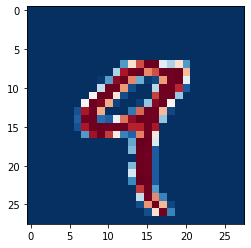

In [23]:
import matplotlib.pyplot as plt

for i in range(5):
   plt.imshow(X[i].reshape((28,28)), cmap='RdBu_r')
   """
    We transform each element in the X dataset into a (28.28) dimensional image
    and visualize it using the RdBu_r color map. Since this line works in a loop,
    this process is done for each element and 5 images are drawn as a result.
   """

In [24]:
"""
This code block creates three different neural network objects with 
different numbers of hidden layer neurons and uses the logistic function as 
their activation function. These objects can then be trained for different classification problems.
"""

from sklearn.neural_network import MLPClassifier

"""
This line creates an object of class MLPClassifier and this object 
creates a neural network with a single hidden layer. The number of neurons of this hidden layer is determined 
by the "hidden_layer_sizes" parameter and is set to 1 here. The "activation" parameter specifies that neurons 
in the hidden layer will use the logistic function as the activation function.
"""
mlp = MLPClassifier(hidden_layer_sizes=1, activation='logistic')

# This time with 100 layers
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation='logistic')

# And 1000 layers
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation='logistic')


In [25]:
"""
The training data trains the neural network with X_train and y_train. 
This training process is performed to learn to match classes of instances
in X_train with labels in y_train.
"""
mlp.fit(X_train,y_train)
"""
---
ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and
the optimization hasn't converged yet.
  warnings.warn(
---
This warning indicates that the optimizing algorithm still has not reached 
the optimal solution when the specified number of iterations (in this case 200) is reached while 
optimizing the multilayer perceptron. This may affect the performance of the model and 
more iterations may be required to obtain better results.
"""
mlp1.fit(X_train,y_train)

mlp2.fit(X_train,y_train)

"""
Test data makes predictions on X_test. These estimates are similar to those of the samples in X_test.
It is created after the training of the artificial neural network to determine the classes.
"""

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'\nTest data makes predictions on X_test. These estimates are similar to those of the samples in X_test.\nIt is created after the training of the artificial neural network to determine the classes.\n'

In [26]:
"""
Test data makes predictions on X_test. These estimates are similar to those of the samples in X_test.
It is created after the training of the artificial neural network to determine the classes.
"""
predictions_NN = mlp.predict(X_test)
predictions_NN

array(['6', '7', '1', ..., '8', '6', '1'], dtype='<U1')

In [27]:
predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

array(['0', '4', '1', ..., '8', '3', '9'], dtype='<U1')

In [28]:
predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

array(['0', '4', '1', ..., '8', '3', '9'], dtype='<U1')

Actual Value: 9
Predicted Value For 1 Hidden Layer: 7
Predicted Value For 100 Hidden Layer: 9
Predicted Value For 1000 Hidden Layer: 9


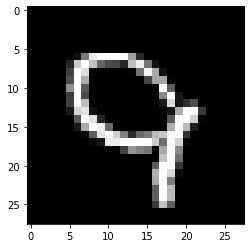

In [29]:
# In order to check if the prediction is correct by taking the example
print(f'Actual Value: {y_test[5]}')
print(f'Predicted Value For 1 Hidden Layer: {predictions_NN[5]}')
print(f'Predicted Value For 100 Hidden Layer: {predictions_NN1[5]}')
print(f'Predicted Value For 1000 Hidden Layer: {predictions_NN2[5]}')

"""
First, the pixel matrix of the sample in the sample dataset is displayed using the "imshow" function. 
Then, by calling the "show" function, the image is opened and displayed on the screen. Here the "cmap='gray'" argument 
is used to display the image in black and white format.
"""
plt.imshow(X_test[5].reshape((28,28)),cmap='gray')
plt.show()

In [30]:
# Operation to evaluate the performance of the model.
from sklearn.metrics import confusion_matrix
"""
The confusion matrix shows correct predictions and incorrect predictions for each class.
Displays the number of predictions. As you can see, thats bad for only one layer.
"""
confusion_matrix(y_test,predictions_NN)

array([[   0,   47,  683,  233,    0,    0, 3928,    8,   12,    0],
       [   0, 4969,   50,  133,    0,    0,   90,  105,  197,    0],
       [   0,  142,  658,  525,    0,    0, 3437,   56,   78,    0],
       [   0,  809, 1022, 1867,    0,    0,  765,  145,  378,    0],
       [   0,  390,   38,   65,    0,    0,   37, 4215,   23,    0],
       [   0,  759,  831, 1817,    0,    0,  498,   96,  383,    0],
       [   0,   29,  205,  116,    0,    0, 4404,    7,   19,    0],
       [   0,  531,   14,   56,    0,    0,   11, 4436,   24,    0],
       [   0, 1719,  359, 1726,    0,    0,  153,  126,  674,    0],
       [   0,  287,   22,   56,    0,    0,   18, 4500,   19,    0]])

In [31]:
confusion_matrix(y_test,predictions_NN1)

array([[4791,    1,   13,    3,    9,   17,   36,    5,   26,   10],
       [   1, 5465,   21,   14,    5,    3,    6,    8,    9,   12],
       [  12,   10, 4728,   28,   32,    5,   10,   31,   37,    3],
       [  12,   13,   72, 4704,    4,   76,    4,   23,   56,   22],
       [   4,   12,   21,    1, 4614,    4,   21,   12,    7,   72],
       [  19,    6,   12,   47,   17, 4187,   43,    5,   33,   15],
       [  21,    9,   15,    4,   16,   30, 4662,    5,   17,    1],
       [   5,   16,   43,   12,   41,    6,    0, 4905,    3,   41],
       [  22,   32,   23,   36,   19,   34,   18,    4, 4540,   29],
       [  16,    9,    6,   34,   93,   21,    4,   60,   22, 4637]])

In [32]:
confusion_matrix(y_test,predictions_NN2)

array([[4819,    1,   14,    6,    6,   12,   21,    3,   21,    8],
       [   1, 5477,   26,    8,    3,    1,    5,    6,    9,    8],
       [  15,    9, 4744,   18,   30,    2,   14,   31,   28,    5],
       [   7,   10,   66, 4734,    4,   62,    3,   18,   61,   21],
       [   6,   12,   18,    2, 4625,    3,   16,    9,    7,   70],
       [  15,    6,   13,   39,    8, 4223,   32,    7,   25,   16],
       [  19,   11,   16,    4,   18,   23, 4662,    7,   20,    0],
       [   1,   20,   43,   13,   34,    5,    0, 4905,    6,   45],
       [  16,   33,   21,   27,   12,   29,   17,    3, 4582,   17],
       [  20,   12,    2,   28,   61,   24,    3,   56,   20, 4676]])

In [33]:
from sklearn.metrics import classification_report
"""
This code block is used to report classification results.
The "classification_report" function generates a report that provides information 
on a number of metrics such as classification accuracy, precision, recall, and F1 score.
"""
print(classification_report(y_test,predictions_NN, zero_division=False))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4911
           1       0.51      0.90      0.65      5544
           2       0.17      0.13      0.15      4896
           3       0.28      0.37      0.32      4986
           4       0.00      0.00      0.00      4768
           5       0.00      0.00      0.00      4384
           6       0.33      0.92      0.49      4780
           7       0.32      0.87      0.47      5072
           8       0.37      0.14      0.21      4757
           9       0.00      0.00      0.00      4902

    accuracy                           0.35     49000
   macro avg       0.20      0.33      0.23     49000
weighted avg       0.21      0.35      0.24     49000



In [34]:
print(classification_report(y_test,predictions_NN1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4911
           1       0.98      0.99      0.98      5544
           2       0.95      0.97      0.96      4896
           3       0.96      0.94      0.95      4986
           4       0.95      0.97      0.96      4768
           5       0.96      0.96      0.96      4384
           6       0.97      0.98      0.97      4780
           7       0.97      0.97      0.97      5072
           8       0.96      0.95      0.96      4757
           9       0.96      0.95      0.95      4902

    accuracy                           0.96     49000
   macro avg       0.96      0.96      0.96     49000
weighted avg       0.96      0.96      0.96     49000



In [35]:
print(classification_report(y_test,predictions_NN2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4911
           1       0.98      0.99      0.98      5544
           2       0.96      0.97      0.96      4896
           3       0.97      0.95      0.96      4986
           4       0.96      0.97      0.97      4768
           5       0.96      0.96      0.96      4384
           6       0.98      0.98      0.98      4780
           7       0.97      0.97      0.97      5072
           8       0.96      0.96      0.96      4757
           9       0.96      0.95      0.96      4902

    accuracy                           0.97     49000
   macro avg       0.97      0.97      0.97     49000
weighted avg       0.97      0.97      0.97     49000

